# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
# medalistas de ouro na modalidade judô
athletes[(athletes['sport'] == 'judo') & athletes['gold'] == 1]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
1463,613088812,Beslan Mudranov,RUS,male,7/7/86,1.66,60.0,judo,1,0,0
3023,561775789,Emilie Andeol,FRA,female,10/30/87,1.70,97.0,judo,1,0,0
3265,425939081,Fabio Basile,ITA,male,10/7/94,1.60,66.0,judo,1,0,0
3986,437669454,Haruka Tachimoto,JPN,female,8/3/90,1.68,70.0,judo,1,0,0
5578,204954873,Kayla Harrison,USA,female,7/2/90,1.73,74.0,judo,1,0,0
5718,182346893,Khasan Khalmurzaev,RUS,male,10/9/93,1.82,81.0,judo,1,0,0
6456,921390591,Lukas Krpalek,CZE,male,11/15/90,1.97,105.0,judo,1,0,0
6598,338727227,Majlinda Kelmendi,KOS,female,5/9/91,1.62,52.0,judo,1,0,0
7116,143690875,Mashu Baker,JPN,male,9/25/94,1.78,90.0,judo,1,0,0
8513,300343611,Paula Pareto,ARG,female,1/16/86,1.50,48.0,judo,1,0,0


Shapiro (0.9961519837379456, 5.681722541339695e-07)
Jarque (13.03363513594265, 0.001478366424594868)
Pearson NormaltestResult(statistic=12.885916255377074, pvalue=0.001591691283619879)


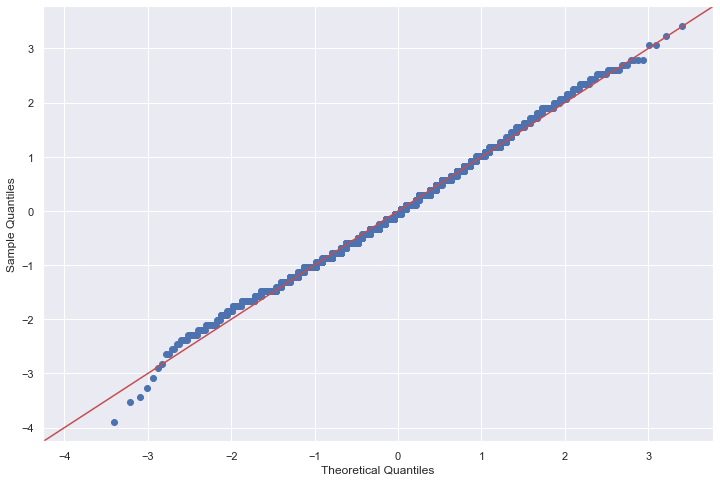

In [7]:
df_sample = get_sample(athletes, 'height', 3000)

print("Shapiro", sct.shapiro(df_sample))
print("Jarque", sct.jarque_bera(df_sample))
print("Pearson", sct.normaltest(df_sample))

sm.qqplot(df_sample, fit=True, line="45");

In [8]:
# quadro de medalhas
athletes.groupby('nationality').sum().sort_values(by='gold', ascending=False).head(10)

,id,height,weight,gold,silver,bronze
nationality,,,,,,
USA,287506489260,1001.15,41020.0,139,54,71
GBR,192718705574,663.54,25820.0,64,55,26
RUS,136720063694,489.34,18830.0,52,29,34
GER,222246354681,789.37,32260.0,49,44,67
CHN,187214499959,711.52,27234.0,46,30,37
BRA,248545331943,839.68,33875.0,37,8,6
AUS,217577798731,745.41,30105.0,23,34,25
ARG,110813411466,396.93,16429.0,21,1,0
FRA,201282774078,732.92,29300.0,20,54,21


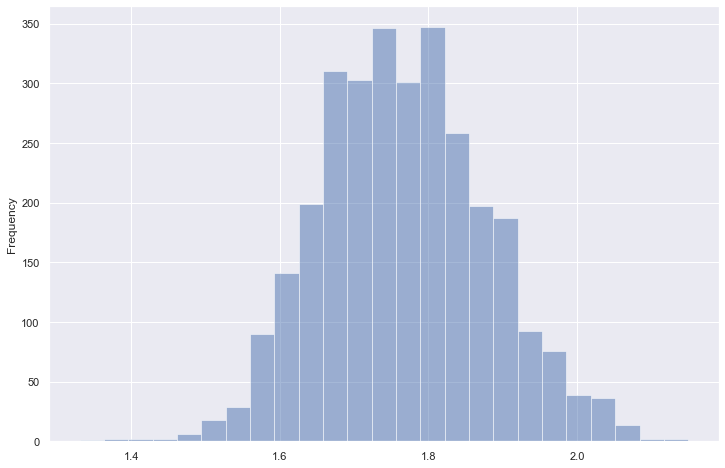

In [9]:
# plot do dfsample
df_sample.plot.hist(bins=25, alpha=0.5)

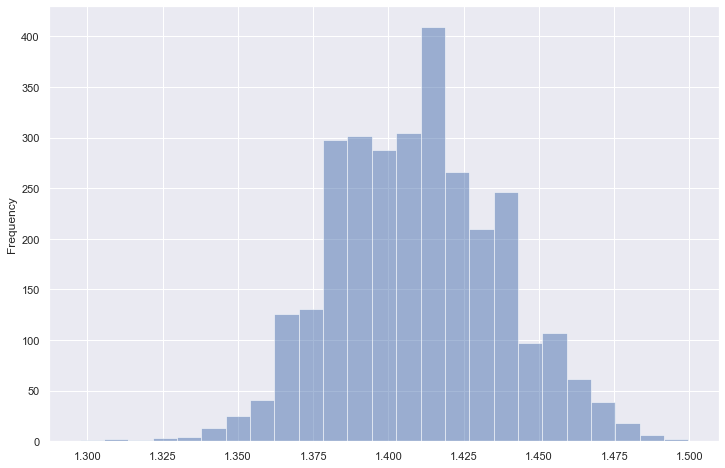

In [10]:
# plot do dfsample após transformação logarítmica 
df_log = np.log(df_sample + np.abs(np.min(df_sample)) + 1)
df_log.plot.hist(bins=25, alpha=0.5)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [11]:
def q1():
    df_sample = get_sample(athletes, 'height', 3000)

    _, shapiro_pvalor = sct.shapiro(df_sample)

    return True if shapiro_pvalor > 0.05 else False

In [12]:
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [13]:
def q2():
    df_sample = get_sample(athletes, 'height', 3000)

    _, jarque_bera_pvalor = sct.jarque_bera(df_sample)

    return True if jarque_bera_pvalor > 0.05 else False

In [14]:
 q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [15]:
def q3():
    df_sample = get_sample(athletes, 'weight', 3000)

    _, pearson_pvalor = sct.normaltest(df_sample)
    
    return True if pearson_pvalor > 0.05 else False

In [16]:
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [17]:
def q4():
    df_sample = get_sample(athletes, 'weight', 3000)

    df_log = np.log(df_sample + np.abs(np.min(df_sample)) + 1)

    _, pearson_pvalor = sct.normaltest(df_log)

    return True if pearson_pvalor > 0.05 else False

In [18]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [19]:
data_usa = athletes.loc[athletes['nationality'] == 'USA', 'height']
data_bra = athletes.loc[athletes['nationality'] == 'BRA', 'height']
data_can = athletes.loc[athletes['nationality'] == 'CAN', 'height']

In [20]:
def q5():
    _, ttest_pvalor = sct.ttest_ind(data_usa, data_bra, equal_var=False, nan_policy='omit') 
    
    return True if ttest_pvalor > 0.05 else False

In [21]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [22]:
def q6():
    _, ttest_pvalor = sct.ttest_ind(data_bra, data_can, equal_var=False, nan_policy='omit') 
    
    return True if ttest_pvalor > 0.05 else False

In [23]:
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [24]:
def q7():
    _, ttest_pvalor = sct.ttest_ind(data_usa, data_can, equal_var=False, nan_policy='omit') 
    
    return float(round(ttest_pvalor, 8))

In [25]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?